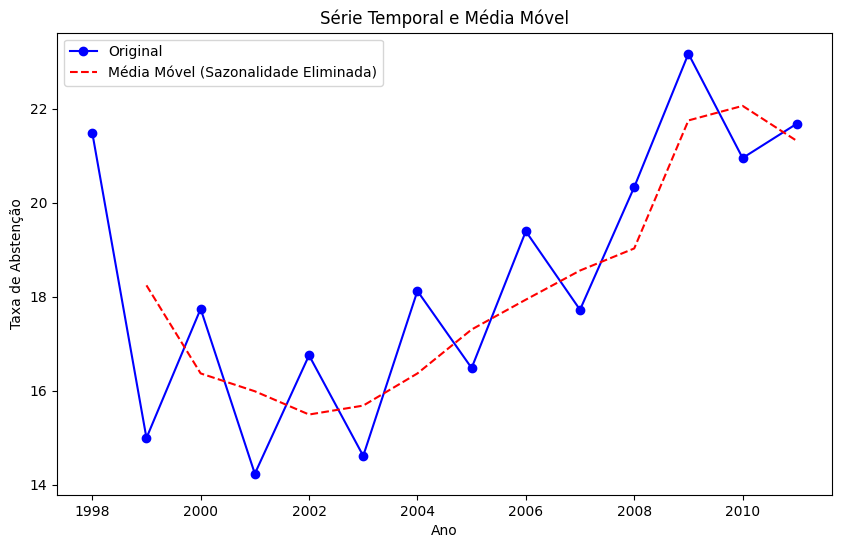

Índice de Kendall Tau: 0.6322712232633236
P-valor: 0.0027443176187391736
Rejeitamos a hipótese nula de não haver tendência (tendência significativa detectada).


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import kendalltau
import matplotlib.pyplot as plt

# Dados fornecidos
dados = [21.49, 14.99, 17.74, 14.23, 16.75, 14.61, 18.12, 16.48, 19.39, 17.72, 20.33, 23.17, 20.95, 21.68]

# Criar um DataFrame
anos = np.arange(1998, 1998 + len(dados))  # Considerando que os anos começam em 1998
df = pd.DataFrame({'Ano': anos, 'Abstencao': dados})

# Aplicando a média móvel para eliminar a sazonalidade
# Utilizando uma janela de 2 anos (exemplo simples para suavizar)
df['Media_Movel'] = df['Abstencao'].rolling(window=2, center=True).mean()

# Visualizar a série original e a suavizada
plt.figure(figsize=(10,6))
plt.plot(df['Ano'], df['Abstencao'], label='Original', marker='o', linestyle='-', color='b')
plt.plot(df['Ano'], df['Media_Movel'], label='Média Móvel (Sazonalidade Eliminada)', linestyle='--', color='r')
plt.title('Série Temporal e Média Móvel')
plt.xlabel('Ano')
plt.ylabel('Taxa de Abstenção')
plt.legend()
plt.show()

# Calculando o índice de Mann-Kendall na série sem sazonalidade
# Remover os NaNs gerados pela média móvel nas bordas
df_clean = df.dropna(subset=['Media_Movel'])

# Calculando o teste de Mann-Kendall para a série suavizada
tau, p_value = kendalltau(df_clean['Ano'], df_clean['Media_Movel'])

# Exibindo os resultados
print(f'Índice de Kendall Tau: {tau}')
print(f'P-valor: {p_value}')

# Interpretação do p-valor
if p_value < 0.05:
    print("Rejeitamos a hipótese nula de não haver tendência (tendência significativa detectada).")
else:
    print("Não rejeitamos a hipótese nula de não haver tendência (nenhuma tendência significativa detectada).")


In [ ]:
df

,Ano,Abstencao,Media_Movel
0,1998,21.49,NaN
1,1999,14.99,18.240
2,2000,17.74,16.365
3,2001,14.23,15.985
4,2002,16.75,15.490
5,2003,14.61,15.680
6,2004,18.12,16.365
7,2005,16.48,17.300
8,2006,19.39,17.935
9,2007,17.72,18.555
